Pulling data from the [BLS](https://www.bls.gov/) Website. 

In [20]:
import pandas as pd 
import json 
import requests 
from IPython.display import display
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.api import OLS

import seaborn as sns 


BLS_KEY = "07b1872f1c8e433fa3ab3420bb243d36"

In [21]:
def clean_bls(lod, d):
    name_map = {} # Creates a dictionary with {name: seriesID}
    for x,y in d.items():
        name_map[y] = x

    out = []
    for i in range(len(lod)):
        col_name = lod[i]['seriesID']
        data = pd.DataFrame.from_dict(lod[i]['data'])
        if 'periodName' not in data.columns:
            pass
        else:
            data['Date'] = data[['periodName', 'year']].agg('-'.join, axis=1)
            data.rename(columns = {'value': name_map[col_name]}, inplace = True)
            data.index = pd.to_datetime(data['Date'])
            data[col_name] = data[name_map[col_name]].astype(float)
            out.append(data[name_map[col_name]])
    return pd.concat(out, axis = 1)

def bls_helper(d, startyear = "2005", endyear= "2022"):
    """
    Enter a dictionary with series id as item and Name of series as the key, API wil connect and return json response 
    """
    name_map = {}
    for x,y in d.items():
        name_map[y] = x
    
    bls_series = []
    for x,y in d.items():
        bls_series.append(y)
    
    headers = {'Content-type': 'application/json'}
    data = json.dumps({'seriesid':bls_series, 'startyear':startyear, 'endyear':endyear, 'registrationkey':BLS_KEY})
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)
    p.close()
    lod = json_data['Results']['series']
    return clean_bls(lod, d), lod

In [22]:
from BLS_IDS import PPI_industry_data, CPI, FoodAndGas, Layoff_events,Employment,Productivity, ts_analysis

In [23]:
#cpi_df, cpi_json = bls_helper(CPI)
#ppi_df, ppi_json = bls_helper(PPI_industry_data)
#food_df, food_json = bls_helper(FoodAndGas)
#layoffs_df, layoff_json = bls_helper(Layoff_events)
#employment_df = bls_helper(Employment)
#porductivity_df = bls_helper(Productivity)


#employment_df.to_csv('data/employment.csv')
#porductivity_df.to_csv('data/productivity.csv')
#ppi_df.to_csv('data/PPI.csv')
#cpi_df.to_csv('data/CPI.csv')
#food_df.to_csv('data/FoodandGas.csv')
#layoffs_df.to_csv('data/Layoff.csv')

In [24]:
#employment_df = pd.read_csv('data/employment.csv')
#productivity_df = pd.read_csv('data/poductivity.csv')
cpi_df = pd.read_csv('data/CPI.csv', parse_dates= True, index_col='Date' )
ppi_df= pd.read_csv('data/PPI.csv', parse_dates= True, index_col='Date' )
food_df = pd.read_csv('data/FoodandGas.csv', parse_dates= True, index_col='Date' )
layoffs_df = pd.read_csv('data/Layoff.csv', parse_dates= True, index_col='Date' )


In [25]:
#PPI Data
def yoy_change(df):
    return df.groupby(df.index.month).pct_change().dropna() #YoY Change

cpi_df.tail()

,CPI for All Urban Consumers (CPI-U) 1982-84=100 (Unadjusted),CPI for All Urban Consumers (CPI-U) 1967=100 (Unadjusted),CPI for Urban Wage Earners and Clerical Workers (CPI-W) 1982-84=100 (Unadjusted),CPI-U/Less Food and Energy (Unadjusted),CPI-W/Less Food and Energy (Unadjusted),Used_Cars_Sales,PPI Final Demand (Seasonally Adjusted),PPI Final Demand (Unadjusted),PPI Final Demand less foods and energy (Unadjusted),"PPI Final Demand less foods, energy, and trade services (Unadjusted)",PPI Finished Goods 1982=100 (Unadjusted),Imports_All Commodities,Exports_All Commodities
Date,,,,,,,,,,,,,
2022-03-01,287.504,861.235,283.176,289.305,281.553,204.562,137.118,137.218,133.816,122.989,246.527,146.8,159.0
2022-04-01,289.109,866.042,284.575,290.846,282.873,203.776,137.705,137.930,134.272,123.515,248.754,147.4,160.3
2022-05-01,292.296,875.589,288.022,292.506,284.413,207.518,138.885,139.231,134.805,123.981,254.966,148.2,165.0
2022-06-01,296.311,887.615,292.542,294.680,286.616,210.863,140.427,140.890,135.409,124.437,263.123,148.5,166.2
2022-07-01,296.276,887.511,292.219,295.646,287.673,209.998,NaN,NaN,NaN,NaN,NaN,NaN,NaN


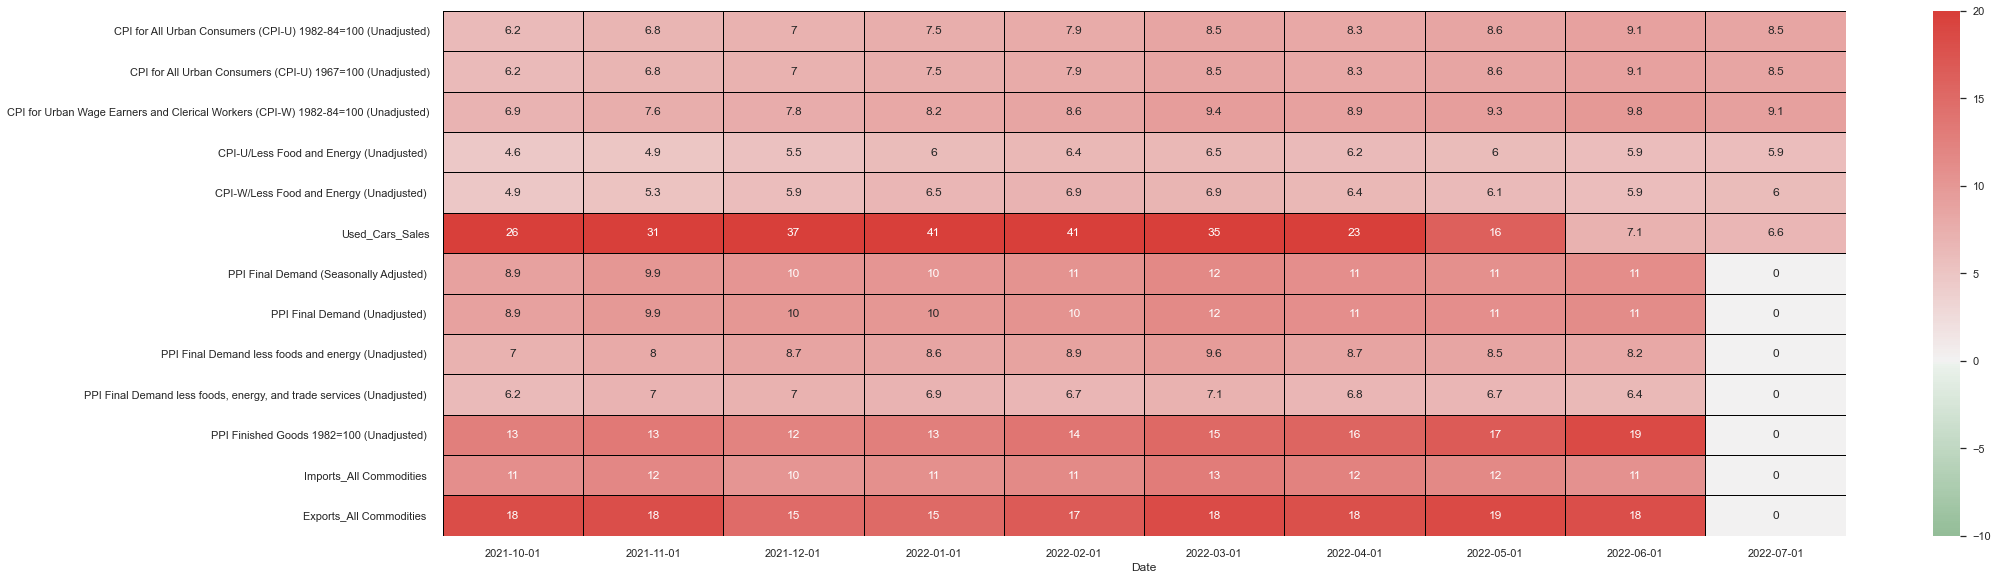

In [26]:
def heat_map(pdf):
    pdf.index = pd.to_datetime(pdf.index)
    sns.set(rc = {'figure.figsize':(28,9)})
    color_map = sns.diverging_palette(130,13, as_cmap=True)
    hmap = sns.heatmap(pdf.T * 100,cmap= color_map , center = 0, annot = True,  vmin=-10, vmax=20, linewidths=1, linecolor='black').set_xticklabels([x.strftime('%Y-%m-%d') for x in pdf.index], rotation = 0)


pmap = yoy_change(cpi_df.astype(float))
heat_map(pmap.tail(10))


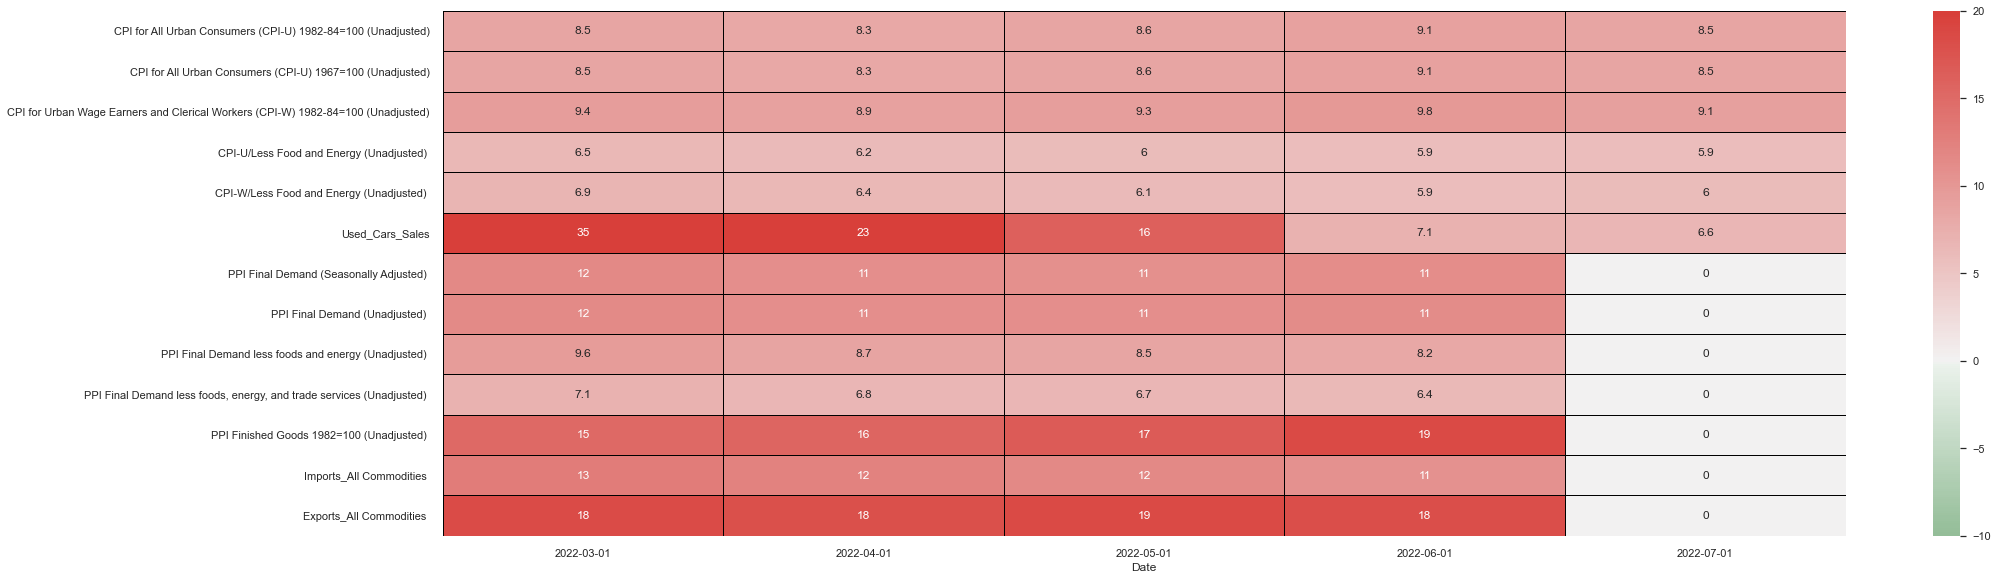

In [27]:
plt.style.use('fivethirtyeight')
heat_map(yoy_change(cpi_df).tail(5))


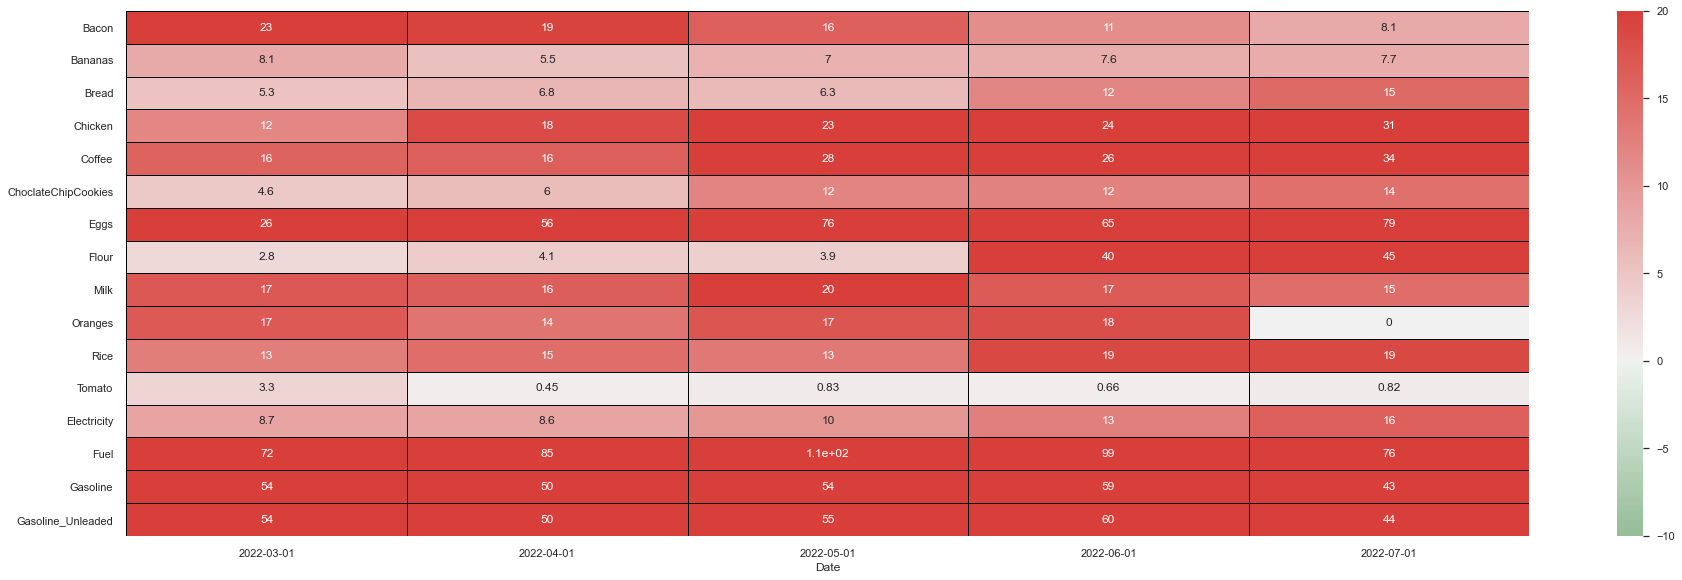

In [28]:
heat_map(yoy_change(food_df).tail(5))

In [32]:
def regressionModel(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
    predictions = lm.predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R^2: ',metrics.explained_variance_score(y_test, predictions) )
    
    return OLS(y_test, predictions).fit().summary()

def plot_all_cols(d, ncols = None, yoy = False):
    df = d.copy()
    if yoy == True: 
        df = yoy_change(df)
    cols = df.columns.to_list()
    if ncols == None: 
        ncols = len(cols)
    num_colors = len(cols)
    plt.style.use('fivethirtyeight')
    linestyle_str = ['solid', 'dotted', 'solid', 'dashed'] * num_colors
    for i, x in enumerate(cols): 
        df[x].plot(figsize = (25,7), linestyle = linestyle_str[np.random.randint(num_colors)]).legend(loc="upper left",ncol = ncols)
    plt.tight_layout()

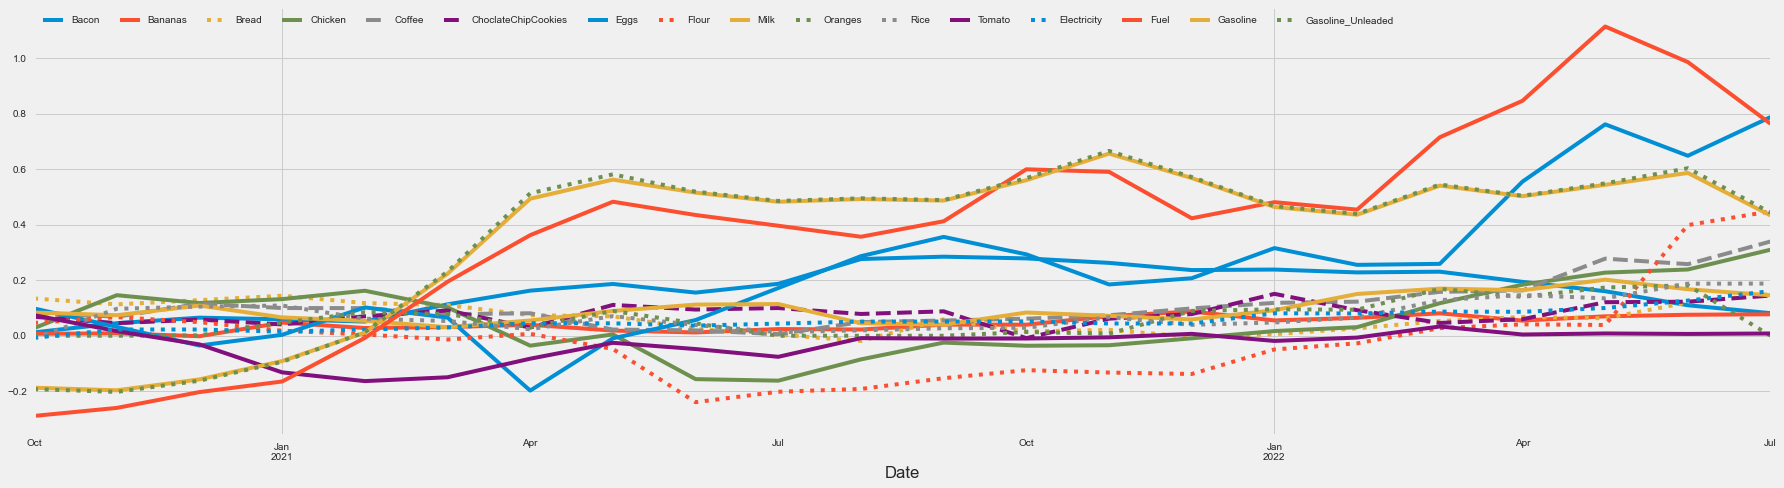

In [35]:
plot_all_cols(food_df.loc['2019-01-01':], yoy=True)

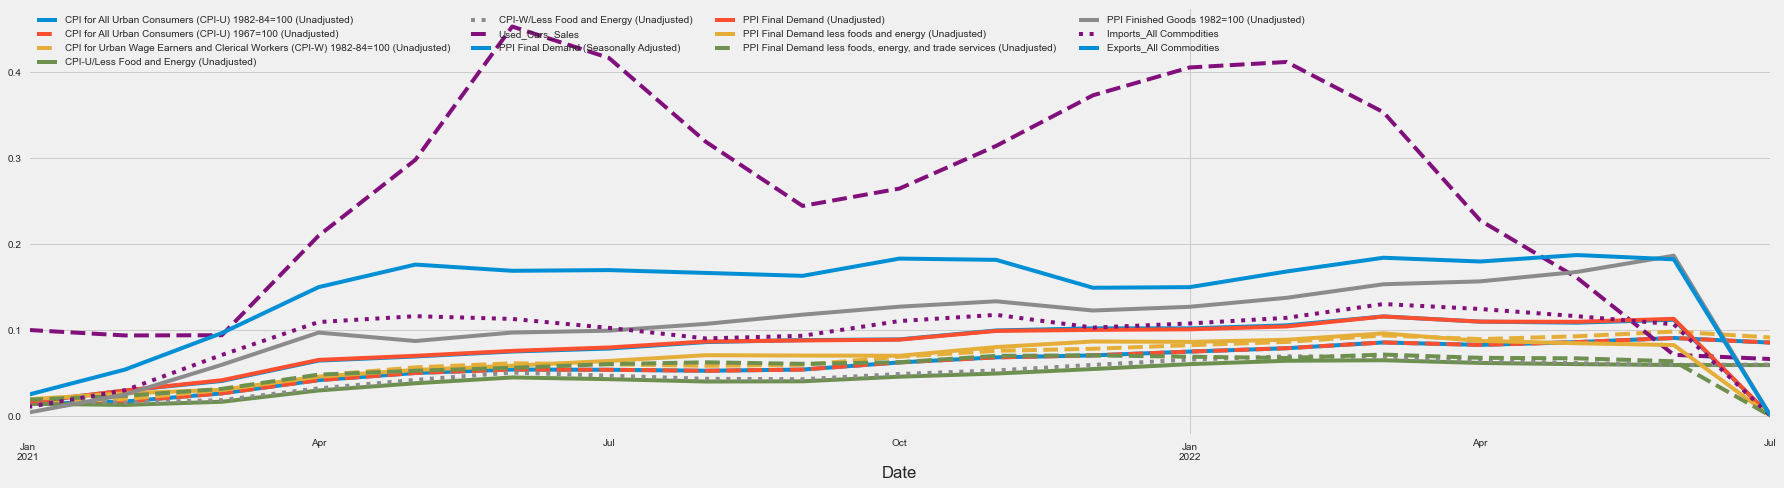

In [36]:
plot_all_cols(cpi_df.loc['2020-01-01':], ncols = 4, yoy=True)

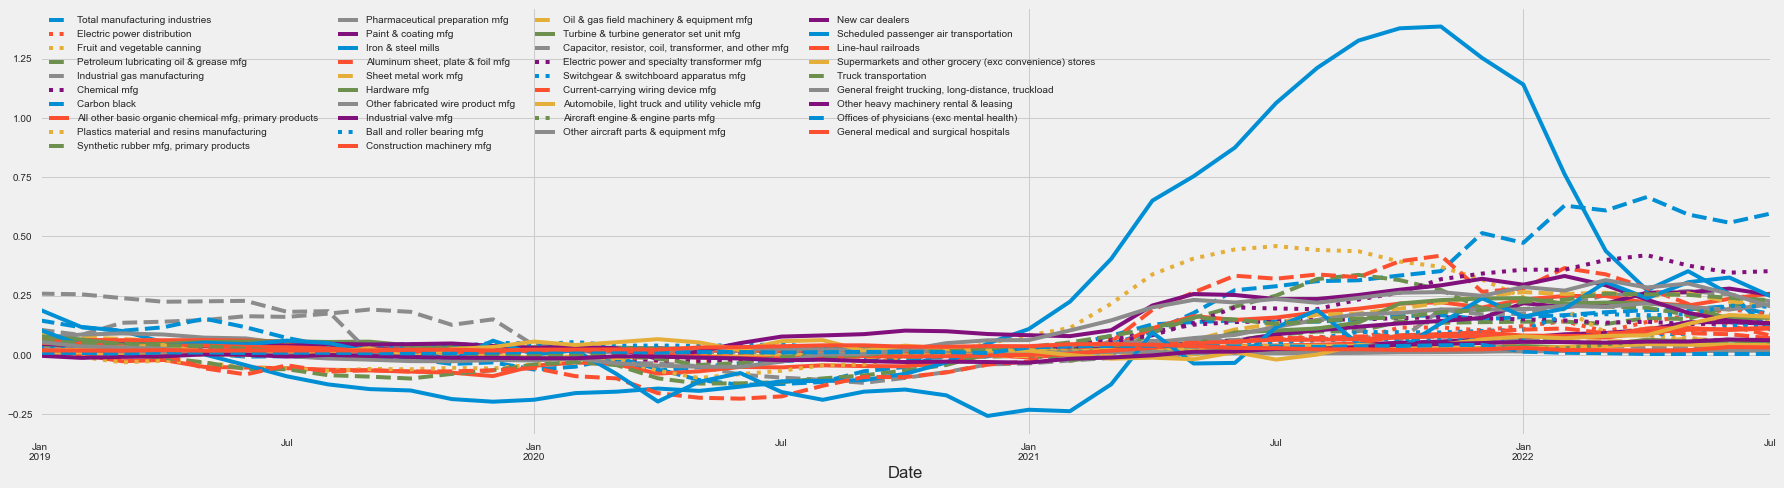

In [37]:
plot_all_cols(ppi_df.loc['2018-01-01':], ncols = 4, yoy=True)

In [14]:
yoy_change(food_df).sort_index().tail().T

Date,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01
Bacon,0.228280,0.230861,0.194208,0.160416,0.109895
Bananas,0.064407,0.080808,0.054636,0.070000,0.075630
Bread,0.026675,0.053080,0.067550,0.062872,0.119868
Chicken,0.030954,0.117304,0.184158,0.227456,0.238806
Coffee,0.122833,0.158210,0.163510,0.277924,0.257980
Eggs,0.255479,0.259077,0.555556,0.761846,0.648599
Flour,-0.027273,0.027523,0.041190,0.038724,0.398876
Milk,0.150534,0.169952,0.163911,0.202173,0.167557
Oranges,0.093868,0.169036,0.140152,0.173880,0.181684
Rice,0.065469,0.128238,0.146497,0.134831,0.187661


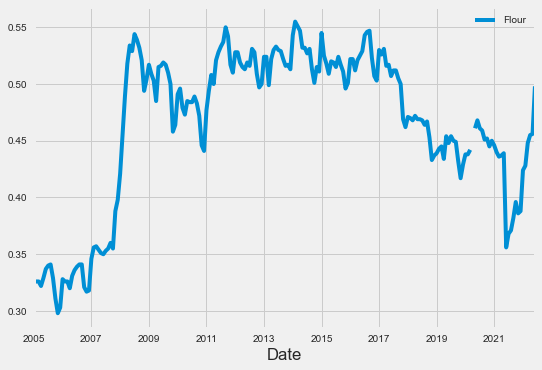

In [15]:
plt.style.use('fivethirtyeight')
#food_df.Bread.plot()
food_df.Flour.plot()
plt.legend()

In [51]:
pmap = yoy_change(ppi_df).tail() *100
pmap.diff().T

Date,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01
Total manufacturing industries,NaN,0.869173,0.374974,1.335043,-3.279048
Electric power distribution,NaN,4.030390,2.583436,2.879316,-2.339332
Fruit and vegetable canning,NaN,2.187296,2.309928,-0.300689,1.924681
Petroleum lubricating oil & grease mfg,NaN,2.519242,-0.413584,5.474827,1.650493
Industrial gas manufacturing,NaN,0.259286,1.407342,-1.440173,-2.947436
Chemical mfg,NaN,0.390789,-0.951223,0.090417,-0.794631
Carbon black,NaN,5.677077,-7.380664,-3.454970,3.846969
"All other basic organic chemical mfg, primary products",NaN,-2.906576,-1.117887,2.807317,2.190163
Plastics material and resins manufacturing,NaN,-1.339601,-0.735238,-2.549569,-3.683259
"Synthetic rubber mfg, primary products",NaN,-0.455180,-3.078711,-1.106462,0.467485
